In [12]:
import os

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import (
    DBSCAN,
    AgglomerativeClustering,
    BisectingKMeans,
    KMeans,
    SpectralClustering,
)
from sklearn.decomposition import PCA
from sklearn.metrics import fowlkes_mallows_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [13]:
histograms = []
labels = []
histogram_label_mapping = {}
current_label_index = 0
target_directory = "dataset"

for directory_name in os.listdir(target_directory):
    directory_path = os.path.join(target_directory, directory_name)
    if directory_name not in histogram_label_mapping:
        histogram_label_mapping[directory_name] = current_label_index
        current_label_index += 1

    for file in os.listdir(directory_path):
        if file.endswith("_histogram.npy"):
            file_path = os.path.join(directory_path, file)
            histogram_data = np.load(file_path)
            histograms.append(histogram_data)
            labels.append(histogram_label_mapping[directory_name])

normalizer = StandardScaler()
histograms_normalized = normalizer.fit_transform(histograms)
labels_array = np.array(labels)

number_of_components = 2
pca_processor = PCA(n_components=number_of_components)
histograms_reduced = pca_processor.fit_transform(histograms_normalized)


To obtain 4 clusters using DBSCAN, the optimal parameters found are:
  - Epsilon (eps): 1.4
  - Minimum Samples (min_samples): 2


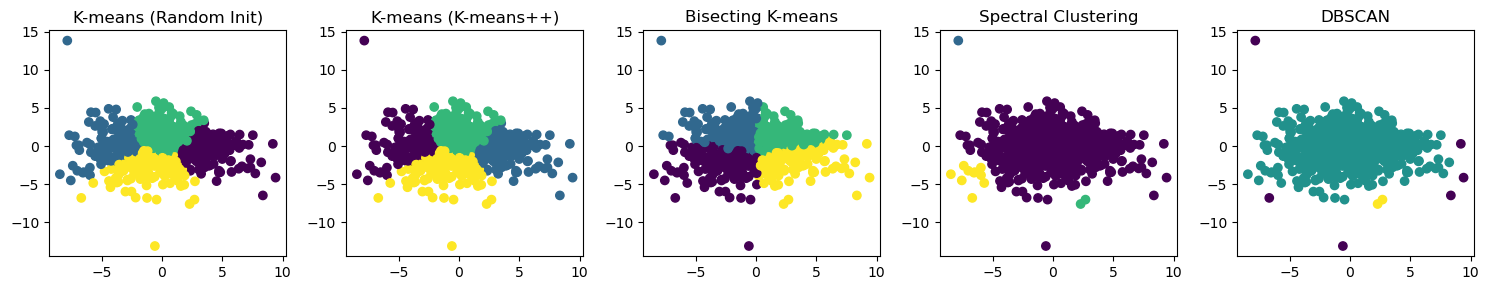

In [14]:
optimal_epsilon = 1.4
optimal_min_samples = 2

print(
    f"To obtain 4 clusters using DBSCAN, the optimal parameters found are:\n"
    f"  - Epsilon (eps): {optimal_epsilon}\n"
    f"  - Minimum Samples (min_samples): {optimal_min_samples}"
)

random_init_kmeans = KMeans(n_clusters=4, init="random", n_init=10, random_state=42)
labels_random_init_kmeans = random_init_kmeans.fit_predict(histograms_reduced)

plus_init_kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, random_state=42)
labels_plus_init_kmeans = plus_init_kmeans.fit_predict(histograms_reduced)

bisect_kmeans = BisectingKMeans(n_clusters=4, init="random", n_init=10, random_state=42)
labels_bisect_kmeans = bisect_kmeans.fit_predict(histograms_reduced)

spectral_cluster = SpectralClustering(n_clusters=4, random_state=42)
labels_spectral_cluster = spectral_cluster.fit_predict(histograms_reduced)

dbscan_cluster = DBSCAN(eps=optimal_epsilon, min_samples=optimal_min_samples)
labels_dbscan_cluster = dbscan_cluster.fit_predict(histograms_reduced)

plt.figure(figsize=(15, 3))

plt.subplot(151)
plt.scatter(histograms_reduced[:, 0], histograms_reduced[:, 1], c=labels_random_init_kmeans, cmap="viridis")
plt.title("K-means (Random Init)")

plt.subplot(152)
plt.scatter(histograms_reduced[:, 0], histograms_reduced[:, 1], c=labels_plus_init_kmeans, cmap="viridis")
plt.title("K-means (K-means++)")

plt.subplot(153)
plt.scatter(histograms_reduced[:, 0], histograms_reduced[:, 1], c=labels_bisect_kmeans, cmap="viridis")
plt.title("Bisecting K-means")

plt.subplot(154)
plt.scatter(histograms_reduced[:, 0], histograms_reduced[:, 1], c=labels_spectral_cluster, cmap="viridis")
plt.title("Spectral Clustering")

plt.subplot(155)
plt.scatter(histograms_reduced[:, 0], histograms_reduced[:, 1], c=labels_dbscan_cluster)
plt.title("DBSCAN")

plt.tight_layout()
plt.show()


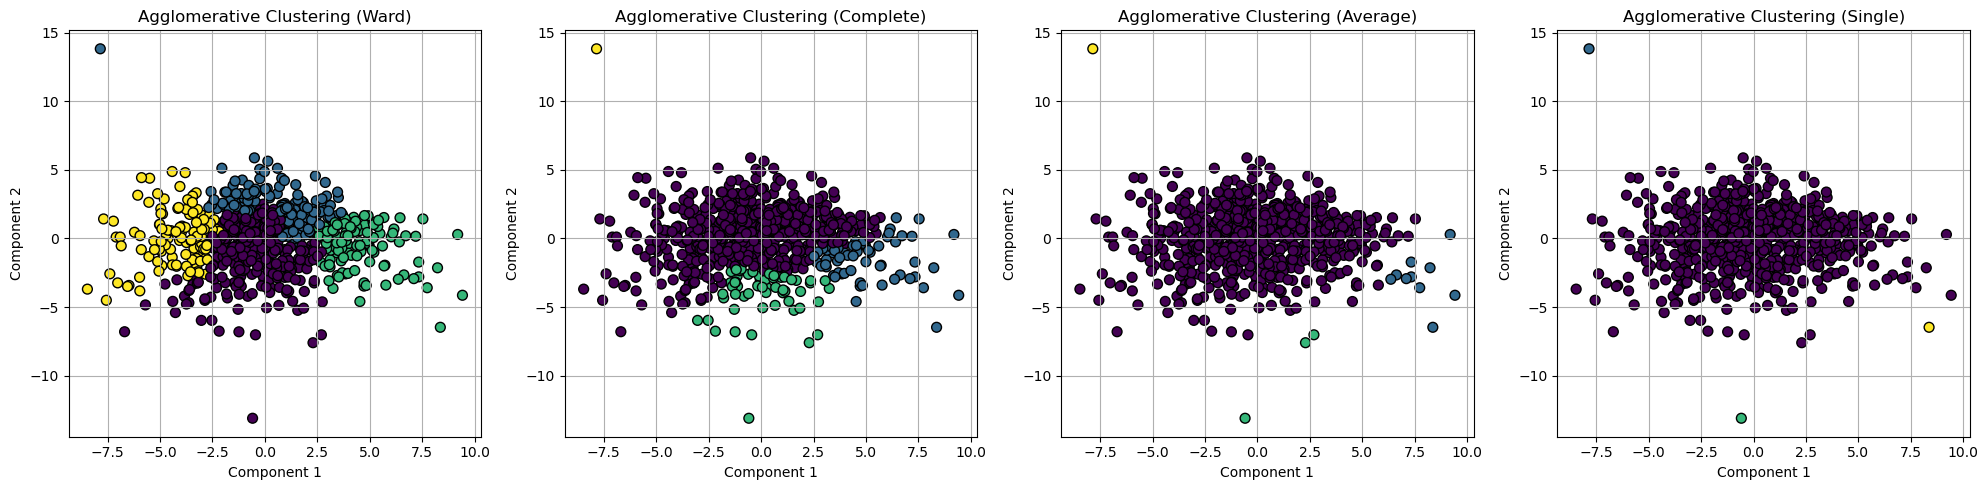

Fowlkes-Mallows Scores:
Agglomerative (Single): 0.50267
Spectral Clustering: 0.49670
DBSCAN: 0.49562
Agglomerative (Average): 0.49541
Agglomerative (Complete): 0.42596
Agglomerative (Ward): 0.28708
K-Means (k-means++): 0.27762
K-Means (Random): 0.27508
Bisecting K-Means: 0.26391

Silhouette Coefficients:
Agglomerative (Single): 0.53551
Agglomerative (Average): 0.42872
K-Means (Random): 0.34289
K-Means (k-means++): 0.34228
DBSCAN: 0.34069
Spectral Clustering: 0.33191
Bisecting K-Means: 0.28236
Agglomerative (Ward): 0.25211
Agglomerative (Complete): 0.21576

Ranking by Fowlkes-Mallows Index:
1. Agglomerative (Single) - FM Score: 0.50267
2. Spectral Clustering - FM Score: 0.49670
3. DBSCAN - FM Score: 0.49562
4. Agglomerative (Average) - FM Score: 0.49541
5. Agglomerative (Complete) - FM Score: 0.42596
6. Agglomerative (Ward) - FM Score: 0.28708
7. K-Means (k-means++) - FM Score: 0.27762
8. K-Means (Random) - FM Score: 0.27508
9. Bisecting K-Means - FM Score: 0.26391

Ranking by Silhouett

In [15]:
linkage_types = ["ward", "complete", "average", "single"]
plt.figure(figsize=(20, 5))

for index, linkage in enumerate(linkage_types):
    agglomerative_cluster = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    cluster_labels = agglomerative_cluster.fit_predict(histograms_reduced)

    plt.subplot(1, 4, index + 1)
    plt.scatter(histograms_reduced[:, 0], histograms_reduced[:, 1], c=cluster_labels, cmap="viridis", edgecolor="k", s=50)
    plt.title(f"Agglomerative Clustering ({linkage.capitalize()})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)

plt.tight_layout()
plt.show()

clustering_methods = {
    "K-Means (Random)": KMeans(n_clusters=4, init="random", random_state=0, n_init=10),
    "K-Means (k-means++)": KMeans(n_clusters=4, init="k-means++", random_state=0, n_init=10),
    "Bisecting K-Means": BisectingKMeans(n_clusters=4, init="random", random_state=0),
    "Spectral Clustering": SpectralClustering(n_clusters=4, random_state=0),
    "DBSCAN": DBSCAN(eps=1.2, min_samples=2),
    "Agglomerative (Ward)": AgglomerativeClustering(n_clusters=4, linkage="ward"),
    "Agglomerative (Complete)": AgglomerativeClustering(n_clusters=4, linkage="complete"),
    "Agglomerative (Average)": AgglomerativeClustering(n_clusters=4, linkage="average"),
    "Agglomerative (Single)": AgglomerativeClustering(n_clusters=4, linkage="single"),
}

fowlkes_mallows_scores = {}
silhouette_scores = {}

for method_name, method in clustering_methods.items():
    method_labels = method.fit_predict(histograms_reduced)
    if len(set(method_labels)) > 1:
        fm_score = fowlkes_mallows_score(labels_array, method_labels)
        silhouette_score_value = silhouette_score(histograms_reduced, method_labels)
        fowlkes_mallows_scores[method_name] = fm_score
        silhouette_scores[method_name] = silhouette_score_value
    else:
        fowlkes_mallows_scores[method_name] = None
        silhouette_scores[method_name] = None

print("Fowlkes-Mallows Scores:")
for method, score in sorted(fowlkes_mallows_scores.items(), key=lambda item: item[1], reverse=True):
    print(f"{method}: {score:.5f}")

print("\nSilhouette Coefficients:")
for method, score in sorted(silhouette_scores.items(), key=lambda item: item[1], reverse=True):
    print(f"{method}: {score:.5f}")

# Rankings
ranked_fm = sorted(fowlkes_mallows_scores.items(), key=lambda x: x[1], reverse=True)
ranked_silhouette = sorted(silhouette_scores.items(), key=lambda x: x[1], reverse=True)

print("\nRanking by Fowlkes-Mallows Index:")
for i, (method, score) in enumerate(ranked_fm):
    print(f"{i + 1}. {method} - FM Score: {score:.5f}")

print("\nRanking by Silhouette Coefficient:")
for i, (method, score) in enumerate(ranked_silhouette):
    print(f"{i + 1}. {method} - Silhouette Score: {score:.5f}")
